<a href="https://colab.research.google.com/github/sity0825/OpenCV_matchTemplate/blob/master/matchTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**▼できること**  
・Googleドライブ内の"template.jpg"をもとにtargetフォルダ内の複数の画像に対して類似度(%)を判定して、判定結果をCSVにまとめる  
  
  ※参考サイト:https://qiita.com/anzanshi/items/507729a3c474fa3151fc

#**▼Googleドライブの構成**  
### マイドライブ > OpenCV_matchTemplate
・"matchTemplate.ipynb"：本ファイル  
・"template.jpg"：比較元となる画像（対象物だけが写る用に事前に加工しておいた方が精度が上がります）  
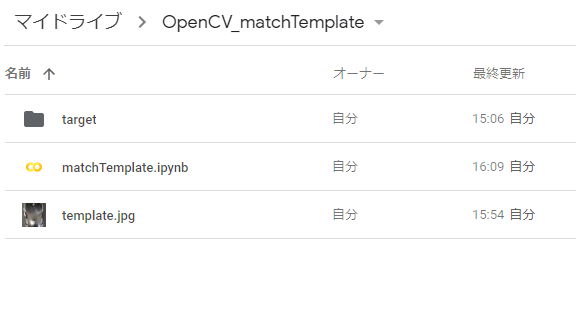


---
### マイドライブ > OpenCV_matchTemplate > target
・比較したい画像一覧  
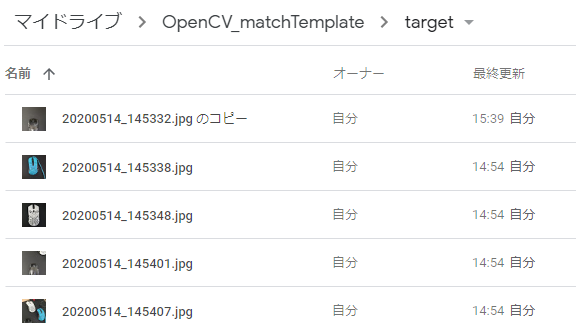


In [139]:
# GoogleDriveのマウント
import google.colab.drive
google.colab.drive.mount('gdrive')

# 上記コマンド実行後に出力されたURLにアクセスし「Google Drive File Stream」のアクセス許可
# その後表示されたコードをコピーしcolabのコードセル「Enter your authorization code:」に続けてペースト

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [0]:
import cv2
import glob
import os
import csv

In [0]:
# 類似度の判定(90%以上なら"1"を返す)
# def Push_Stamp(num):
#     if 0.90 < num:
#         return 1
#     else:
#         return 0

# 類似度の判定(割合をそのまま返す)
def Push_Stamp(num):
    num = num*100
    return f'{num:.2f}'


In [0]:
# 比較する画像一覧の取得
target_path = "gdrive/My Drive/OpenCV_matchTemplate/target/"
files =glob.glob(target_path +"*") #検索画像保管フォルダの配下をすべて取得

In [129]:
# 確認用
files

['gdrive/My Drive/OpenCV_matchTemplate/target/20200514_145407.jpg',
 'gdrive/My Drive/OpenCV_matchTemplate/target/20200514_145338.jpg',
 'gdrive/My Drive/OpenCV_matchTemplate/target/20200514_145348.jpg',
 'gdrive/My Drive/OpenCV_matchTemplate/target/20200514_145401.jpg',
 'gdrive/My Drive/OpenCV_matchTemplate/target/20200514_145332.jpg のコピー']

In [0]:
# 比較元になる画像を取得
template_path = "gdrive/My Drive/OpenCV_matchTemplate/"
filename = "template.jpg"
template = cv2.imread(template_path + filename)

In [0]:
# 確認用
#from google.colab.patches import cv2_imshow
#cv2_imshow(template)

In [0]:
# CSV書き込み用の配列
wrcsv = []

In [0]:
for fname in files:
    # 検索対象画像の読み込み
    image = cv2.imread(fname)
    # 画像マッチング処理 
    result = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
    # 最も類似度が高い位置を取得する。
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
    # 類似度から、判定結果を求める（上で設定した式を使用）
    Judg = Push_Stamp(maxVal)
    # ファイルパスから、ファイル名と拡張子を取得
    filename, ext = os.path.splitext( os.path.basename(fname) )
    # CSVに書き込み
    wrcsv.append([filename,Judg])

In [0]:
header = ['ファイル名', '類似度(%)']

with open('gdrive/My Drive/OpenCV_matchTemplate/output.csv', "w") as f:
    writer2 = csv.writer(f, lineterminator="\n") # writerオブジェクトの作成 改行記号で行を区切る
    writer2.writerow(header)
    writer2.writerows(wrcsv) # csvファイルに書き込み

In [143]:
 import pandas as pd
 pd.read_csv('gdrive/My Drive/OpenCV_matchTemplate/output.csv') #CSVの読み込み↓

,ファイル名,類似度(%)
0,20200514_145407,92.01
1,20200514_145338,80.95
2,20200514_145348,81.29
3,20200514_145401,91.41
4,20200514_145332,99.99
